In [20]:
%matplotlib inline

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.ticker import MaxNLocator
from csv import reader

In [58]:
import seaborn as sns
sns.set(color_codes=True)

In [59]:
import pandas as pd
import numpy as np

# Part II

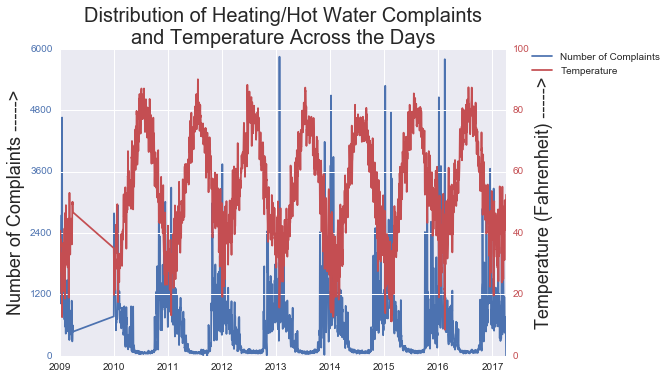

In [60]:
#Distribution of Heating/Hot Water Complaints and Temperature across the days

heating_complaints_temp = pd.read_csv('../res_use_cases/heating_complaints_temp.out', names = ["date", "num_complaints", "temp", "state"])
heating_complaints_temp['date'] = pd.to_datetime(heating_complaints_temp['date'], format='%Y%m%d').dt.date

fig, ax1 = plt.subplots()  

title = ('Distribution of Heating/Hot Water Complaints'
         '\nand Temperature Across the Days')
plt.title(title, fontsize=20)

g1 = ax1.plot(heating_complaints_temp.date, heating_complaints_temp.num_complaints, 'b', label='Number of Complaints')

ax1.set_ylabel('Number of Complaints ----->', fontsize=18)
ax1.set_ylim(0, 6000)
for i in ax1.get_yticklabels():
    i.set_color('b')

ax2 = ax1.twinx()
g2 = ax2.plot(heating_complaints_temp.date, heating_complaints_temp.temp, 'r', label='Temperature')

ax2.set_ylabel('Temperature (Fahrenheit) ----->', fontsize=18)
ax2.set_ylim(0, 100)
for i in ax2.get_yticklabels():
    i.set_color('r')
  
lines = g1 + g2
ax1.legend(lines, [l.get_label() for l in lines], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))

plt.show()

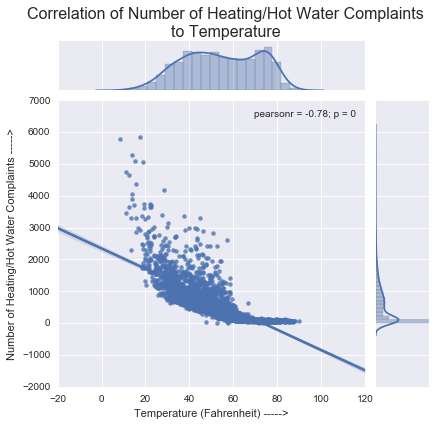

In [61]:
#Correlation plot of Number of Heating/Hot Water Complaints to Temperature
title = ('Correlation of Number of Heating/Hot Water Complaints'
         '\nto Temperature')
g = sns.jointplot(x="temp", y="num_complaints", data=heating_complaints_temp, kind='reg')
g.fig.suptitle(title, fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.ax_joint.set_xlabel("Temperature (Fahrenheit) ----->")
g.ax_joint.set_ylabel("Number of Heating/Hot Water Complaints ----->")

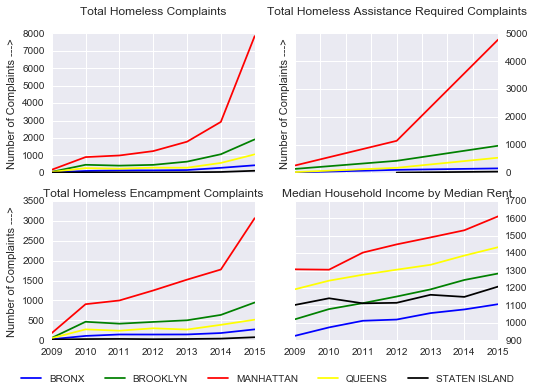

In [83]:
# Distribution of Homeless complaints with Income Gap
homeless_complaints = pd.read_csv('../res_use_cases/homeless_complaints_combined_with_income_gap.out',  names = ["year", "borough", "num_complaints", "income"])
homeless_complaints['year'] = pd.to_datetime(homeless_complaints['year'], format='%Y').dt.date

assistance_homeless_complaints = pd.read_csv('../res_use_cases/homeless_assistance_complaints_with_income_gap.out',  names = ["year", "borough", "num_complaints", "income"])
assistance_homeless_complaints['year'] = pd.to_datetime(assistance_homeless_complaints['year'], format='%Y').dt.date

homeless_encampment_complaints = pd.read_csv('../res_use_cases/homeless_encampment_complaints_with_income_gap.out',  names = ["year", "borough", "num_complaints", "income"])
homeless_encampment_complaints['year'] = pd.to_datetime(homeless_encampment_complaints['year'], format='%Y').dt.date


fig, ax1 = plt.subplots(2,2)
colors = ['blue','green','red','yellow','black']
color_idx = 0
for label, df in homeless_complaints.groupby('borough'):
    ax1[0,0].plot(df.year, df.num_complaints, label=label, color = colors[color_idx])
    ax1[1,1].plot(df.year, df.income, label=label, color = colors[color_idx])
    color_idx += 1
    
ax1[0, 0].set_title('Total Homeless Complaints', y=1.10)
ax1[0,0].set_ylabel('Number of Complaints --->', fontsize=11)
ax1[1, 1].set_title('Median Household Income by Median Rent', linespacing=3)
ax1[1, 1].yaxis.tick_right()
color_idx = 0
for label, df in assistance_homeless_complaints.groupby('borough'):
    ax1[0,1].plot(df.year, df.num_complaints, label=label, color = colors[color_idx])
    color_idx += 1

ax1[0, 1].yaxis.tick_right()
ax1[0, 1].set_title('Total Homeless Assistance Required Complaints', y=1.10)
ax1[0, 1].set_ylabel('Number of Complaints --->', fontsize=11)
 
color_idx = 0    
for label, df in homeless_encampment_complaints.groupby('borough'):
    lines = ax1[1,0].plot(df.year, df.num_complaints, label=label, color = colors[color_idx])
    color_idx += 1
ax1[1, 0].set_title('Total Homeless Encampment Complaints', linespacing =6)
ax1[1, 0].set_ylabel('Number of Complaints --->', fontsize=11)

# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in ax1[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in ax1[:, 1]], visible=False)

# Create custom legend
blue_line = mlines.Line2D([], [], color=colors[0],markersize=15, label='BRONX')
green_line = mlines.Line2D([], [], color=colors[1], markersize=15, label='BROOKLYN')
red_line = mlines.Line2D([], [], color=colors[2], markersize=15, label='MANHATTAN')
yellow_line = mlines.Line2D([], [], color=colors[3], markersize=15, label='QUEENS')
black_line = mlines.Line2D([], [], color=colors[4], markersize=15, label='STATEN ISLAND')

handles = [blue_line,green_line,red_line,yellow_line,black_line]
labels = [h.get_label() for h in handles] 

#fig.legend(handles=handles, labels=labels, loc='lower left')
plt.figlegend( handles, labels, loc = 'lower center', ncol=5, labelspacing=0. )

plt.show()
